In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense,Dropout
from keras.models import Sequential

(train_x, train_y) , (test_x, test_y) = mnist.load_data()
train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)


model = Sequential()
model.add(Dense(units=256,activation="relu",input_shape=(784,)))
model.add(Dropout(0.4))
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=10,activation="softmax"))


model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])

model.fit(train_x,train_y,batch_size=2048,epochs=100)

accuracy = model.evaluate(x=test_x,y=test_y,batch_size=1024)

print("Accuracy: ",accuracy[1])

Using TensorFlow backend.
W0807 07:59:48.916904 140556611008384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 07:59:48.934531 140556611008384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 07:59:48.937587 140556611008384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 07:59:48.960711 140556611008384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instea

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


W0807 07:59:49.128545 140556611008384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 07:59:49.158271 140556611008384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0807 07:59:49.279802 140556611008384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
60000/60000 [==============================] - 2s 33us/step - loss: 1.7319 - acc: 0.3898
Epoch 2/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.7627 - acc: 0.7570
Epoch 3/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.4653 - acc: 0.8688
Epoch 4/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3512 - acc: 0.9066
Epoch 5/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.2918 - acc: 0.9231
Epoch 6/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.2546 - acc: 0.9330
Epoch 7/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.2258 - acc: 0.9405
Epoch 8/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.2017 - acc: 0.9474
Epoch 9/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.1837 - acc: 0.9531
Epoch 10/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1667 - acc: 0.

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import os
os.chdir('drive/My Drive/Colab Notebooks/ML workshop')
cwd=os.getcwd()
print(cwd)

/content/drive/My Drive/Colab Notebooks/ML workshop


The label is 4
The Predicted value is 4


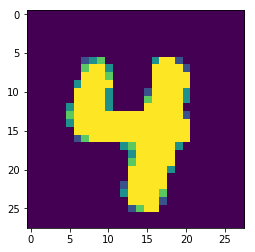

In [6]:
index=1253
(train_x, train_y) , (test_x, test_y) = mnist.load_data()
print('The label is '+ str(train_y[index]))
img=train_x[index]
test_img = img.reshape((1,784))
ans=model.predict(test_img)
print('The Predicted value is ' +str(np.argmax(ans)))

plt.imshow(img)
plt.show()



In [0]:
#cv2.imwrite('ML workshop/check_1.jpg',img)

##To Convert the image into required format

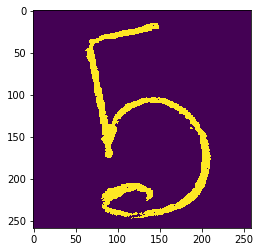

In [10]:
num=cv2.imread('Digit Recognition/images/num_15.jpg')
num=cv2.cvtColor(num, cv2.COLOR_BGR2GRAY)
#num.resize(28,28)
(thresh, num) = cv2.threshold(num, 110, 255, cv2.THRESH_BINARY_INV)
 
plt.imshow(num)

In [0]:
path="Digit Recognition/images/con_9.jpg"
cv2.imwrite(path,num)

True

##Predicting from the model

Predicted value is 7


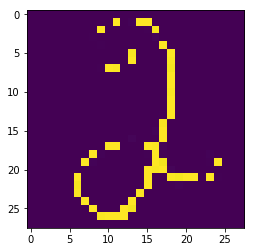

In [11]:
#path="Digit Recognition/images/con_7.jpg"
img = image.load_img(path,color_mode = "grayscale",target_size=(28,28))
img = image.img_to_array(img)
test_img = img.reshape((1,784))
ans=model.predict(test_img)

print('Predicted value is '+ str(np.argmax(ans)))
img = img.reshape((28,28))
plt.imshow(img)

plt.show()